<a href="https://colab.research.google.com/github/VaidikPrabhu/Mini-Project---Image-Classification/blob/master/ML_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install bing-image-downloader

In [29]:
!ls

drive  sample_data


In [30]:
cd /content/drive/My Drive/Machine-Learning

/content/drive/My Drive/Machine-Learning


In [31]:
!mkdir Image-Classification

In [32]:
cd Image-Classification

/content/drive/My Drive/Machine-Learning/Image-Classification


In [33]:
from bing_image_downloader import downloader

In [34]:
downloader.download("banana fruit", limit = 20, output_dir = 'Image-Classification')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-gcGCJsbTAY0/T7hKgxLiY7I/AAAAAAAAAL4/R4seeHldb_E/s1600/banana-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.feedipedia.org/sites/default/files/images/banana_cavendish.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2013/04/22/18/24-Banana.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://buzzghana.com/wp-content/uploads/2015/08/banana-e1439973458806.png
[%] File Downloaded !

[%] Downloading Image #5 from https://www.organicfacts.net/wp-content/uploads/2013/05/Banana3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://4.bp.blogspot.com/-PB1VYJjSCQE/UREBbiEkphI/AAAAAAAAARM/a1tawzVrOA0/s1600/banana.jpeg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.kuali.com/wp-content/uploads/2014/10/bananas.jpg
[%] File Downloaded !

[%] Downloadi

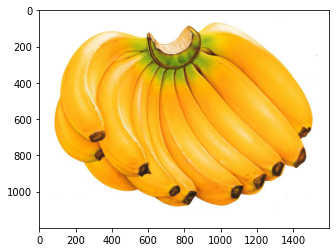

In [35]:
path = '/content/drive/My Drive/Machine-Learning/Image-Classification/Image-Classification/banana fruit/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt
i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [36]:
downloader.download("papaya fruit", limit = 20, output_dir = 'Image-Classification')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://nicolelana.com/wp-content/uploads/2014/05/Green-Papaya-Fruit-image-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://4.bp.blogspot.com/-qZUN3zJS5D4/VBqQP7J-OsI/AAAAAAAAAJk/lMVTM8kjxzQ/s1600/pepaya.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://sundayfarmer.files.wordpress.com/2011/02/papaya.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://rampages.us/mrbananapepper/wp-content/uploads/sites/2634/2014/10/FA0385-Papaya.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.thestar.com/5NAF5R9driqD0k4ftEdJ-_TXT1E=/1086x824/smart/filters:cb(2700061000)/https://www.thestar.com/content/dam/thestar/life/food_wine/2013/04/05/sweet_papaya_a_nutritional_powerhouse_fresh_bites/papaya.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.britannica.com/31/157531-050-25D8087E/Papaya-fruit.jpg
[%] File Downloaded !

[%] Downl

In [37]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np

In [38]:
target = []    #This is the list of Target Output
flat_data = []    #Image pixel in flatten style
images = []

path = '/content/drive/My Drive/Machine-Learning/Image-Classification/Image-Classification/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))    #Scalingdown
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

In [39]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(40, 7500)
(40,)
(40, 50, 50, 3)


In [40]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,banana fruit
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,banana fruit
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,banana fruit
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,banana fruit
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,0.981373,0.975980,0.961765,0.980882,0.968137,0.946078,0.992157,0.992157,0.990686,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.893137,0.893137,0.893137,0.918627,0.918627,0.918627,0.941176,0.941176,0.941176,0.958824,0.958824,0.958824,0.974510,0.974510,0.974510,0.984314,0.984314,0.984314,0.988235,0.988235,0.988235,0.992157,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,banana fruit


In [42]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.798014,0.796320,0.780214,0.800981,0.798985,0.780152,0.803190,0.801266,0.783880,0.803879,0.801920,0.784928,0.806731,0.804100,0.786810,0.806307,0.801927,0.783884,0.798876,0.791825,0.774288,0.790279,0.780395,0.757700,0.775174,0.762973,0.731621,0.764695,0.750429,0.712663,0.761127,0.745246,0.702343,0.762590,0.747472,0.701494,0.758129,0.741451,0.696445,0.746555,...,0.751726,0.788982,0.772789,0.751892,0.795138,0.783727,0.755497,0.794374,0.785929,0.758038,0.792827,0.784430,0.758780,0.783208,0.775061,0.753075,0.781142,0.773956,0.750425,0.786526,0.777380,0.752786,0.789992,0.778259,0.755592,0.793980,0.782904,0.760701,0.797388,0.787543,0.765454,0.796749,0.787105,0.765223,0.789895,0.778682,0.756718,0.781572,0.770204,0.752491
std,0.348806,0.352117,0.375678,0.346712,0.347907,0.373436,0.346961,0.345764,0.366097,0.343913,0.343236,0.366079,0.343064,0.341965,0.363013,0.343709,0.342115,0.360059,0.346205,0.347166,0.366280,0.344838,0.343016,0.365960,0.354389,0.350604,0.382196,0.356907,0.355758,0.395396,0.358757,0.356877,0.402425,0.362243,0.357799,0.404585,0.357273,0.357886,0.408148,0.359404,...,0.372866,0.328126,0.344232,0.373841,0.325721,0.331344,0.369330,0.329897,0.328685,0.366001,0.331751,0.330639,0.370721,0.337567,0.338812,0.373812,0.344561,0.345580,0.378861,0.342932,0.343860,0.377903,0.346178,0.347197,0.377400,0.348248,0.347771,0.374194,0.348265,0.346335,0.370496,0.348389,0.347232,0.371378,0.347385,0.351736,0.382478,0.350416,0.361383,0.390071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.772549,0.757196,0.695098,0.793593,0.733578,0.698235,0.801961,0.728431,0.706863,0.802941,0.728186,0.703676,0.804902,0.725490,0.721569,0.808824,0.724510,0.712805,0.730451,0.713746,0.667529,0.717157,0.655784,0.588039,0.703186,0.638725,0.573799,0.591637,0.609108,0.384833,0.573765,0.556000,0.255373,0.623012,0.571157,0.238387,0.566980,0.523569,0.266912,0.491687,...,0.627510,0.707353,0.619304,0.607843,0.694608,0.660479,0.590457,0.745098,0.662684,0.653276,0.684314,0.641667,0.594118,0.647549,0.459059,0.468377,0.677029,0.464426,0.454162,0.678431,0.515461,0.416176,0.676490,0.575853,0.418447,0.670608,0.633392,0.543863,0.672549,0.659755,0.594118,0.677451,0.677495,0.559804,0.681536,0.55204

In [43]:
x = flat_data
y = target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

In [44]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = model.predict(x_test)
y_pred

array(['papaya fruit', 'papaya fruit', 'papaya fruit', 'banana fruit',
       'banana fruit', 'banana fruit', 'papaya fruit', 'banana fruit',
       'papaya fruit', 'papaya fruit'], dtype='<U12')

In [46]:
y_test

array(['papaya fruit', 'papaya fruit', 'papaya fruit', 'banana fruit',
       'banana fruit', 'banana fruit', 'papaya fruit', 'banana fruit',
       'banana fruit', 'papaya fruit'], dtype='<U12')

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [48]:
accuracy_score(y_pred,y_test)

0.9

In [49]:
confusion_matrix(y_pred,y_test)

array([[4, 0],
       [1, 5]])

In [50]:
print("Classification report for - \n{}:\n{}\n".format(model,classification_report(y_test, y_pred)))

Classification report for - 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

banana fruit       1.00      0.80      0.89         5
papaya fruit       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10




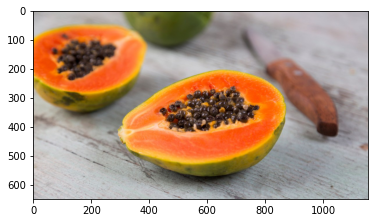

In [51]:
from skimage.io import imread
import matplotlib.pyplot as plt
i = imread('https://i0.wp.com/images-prod.healthline.com/hlcmsresource/images/AN_images/papaya-benefits-1296x728-feature.jpg?w=1155&h=1528')
plt.imshow(i)

In [52]:
img_resize_1 = resize(i,(50,50,3))
r = img_resize_1.flatten()
print(r.shape)
model.predict([r])

(7500,)


array(['papaya fruit'], dtype='<U12')

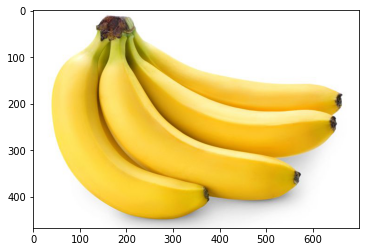

In [53]:
from skimage.io import imread
import matplotlib.pyplot as plt
i = imread('https://cdn.mos.cms.futurecdn.net/42E9as7NaTaAi4A6JcuFwG-1200-80.jpg')
plt.imshow(i)

In [54]:
img_resize_1 = resize(i,(50,50,3))
r = img_resize_1.flatten()
print(r.shape)
model.predict([r])

(7500,)


array(['banana fruit'], dtype='<U12')